# Code for Semaphore management

- Semaphore work only when the data are gathered and we compute the mean of the asymmetry index for deciding semaphore behavior, we do this base on the mean of the AHA data and the mean on the week data, compute is done in Median.ipynb

## Import clean data (only when user is mooving)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Below code takes around 1 minute to run

In [2]:
# import data aha and week

# !todo: Maybe save a file in a new folder clean_data called 1_AHA_clean.csv same for week

# for the moment we use the raw data
aha_data = pd.read_csv("../raw_data/1_AHA_RAW.csv")  
# take in chunk data from week 1 day chunk is 60*60*8*24 where 8 is sample rate and the rest is second in a day
SECOND_IN_A_DAY = 60*60*24
SAMPLE_RATE = 8
DAY_CHUNK = SECOND_IN_A_DAY*SAMPLE_RATE
DAYS = 7
# Taking chunk of 1 day

chunks = []

for chunk in pd.read_csv("../raw_data/1_week_RAW.csv", chunksize=DAY_CHUNK*7):
    chunks.append(chunk)


In [3]:
print("Number of chunks: ", len(chunks))

# Sum over all chunks to get the total number of samples
total_samples = 0
for chunk in chunks:
    total_samples += len(chunk)

print("Total number of samples: ", total_samples)


Number of chunks:  9
Total number of samples:  41472000


# Data cleaning

In [4]:
# Drop column datetime from each chunk
for i in range(len(chunks)):
    chunks[i] = chunks[i].drop(columns=["datetime"])

In [5]:
df_week = pd.concat(chunks, ignore_index=True)

df_week

,x_D,y_D,z_D,x_ND,y_ND,z_ND
0,-0.949,0.035,0.273,-0.957,0.008,0.277
1,-0.953,0.027,0.273,-0.957,0.000,0.277
2,-0.953,0.027,0.266,-0.961,0.000,0.270
3,-0.949,0.023,0.266,-0.957,0.000,0.273
4,-0.949,0.023,0.270,-0.957,-0.004,0.273
...,...,...,...,...,...,...
41471995,-0.730,0.086,-0.691,0.906,-0.242,0.344
41471996,-0.727,0.082,-0.695,0.910,-0.242,0.348
41471997,-0.730,0.078,-0.691,0.902,-0.242,0.340
41471998,-0.727,0.074,-0.691,0.906,-0.246,0.344


In [6]:
# Divide them by day

day_chunks = []
for i in range(DAYS):
    day_chunks.append(df_week[i*DAY_CHUNK:(i+1)*DAY_CHUNK])
    


# Cleaning day 3 anomaly

In [7]:
ANOMALY = False
# We just drop all the anomalous data
if ANOMALY:
    # Number of samples in day 3
    print("Number of samples in day 3: ", len(day_chunks[2]))
    # drop data anomalous in day 3 from 1.8 mil to 1.9 mil
    day_chunks[2] = day_chunks[2].drop(day_chunks[2].index[235000:]) 

    print("Number of samples in day 3 after dropping: ", len(day_chunks[2]))

In [8]:
print("Number of day chunks: ", len(day_chunks))

# Calculate the magnitude of each day chunk for dominant and non-dominant hand
magnitude_D = []
magnitude_ND = []

for i in range(DAYS):
    magnitude_D.append(np.sqrt(day_chunks[i]["x_D"]**2 + day_chunks[i]["y_D"]**2 + day_chunks[i]["z_D"]**2))
    magnitude_ND.append(np.sqrt(day_chunks[i]["x_ND"]**2 + day_chunks[i]["y_ND"]**2 + day_chunks[i]["z_ND"]**2))
# Calculate the mean of each day chunk for dominant and non-dominant hand
mean_D = []
mean_ND = []

for i in range(DAYS):
    mean_D.append(np.mean(magnitude_D[i]))
    mean_ND.append(np.mean(magnitude_ND[i]))
    
print("Mean of dominant hand: ", mean_D)
print("Mean of non-dominant hand: ", mean_ND)

# Get variance of each day chunk for dominant and non-dominant hand
# and one for each axiss
var_D = []
var_ND = []

var_D_x = []
var_D_y = []
var_D_z = []

var_ND_x = []
var_ND_y = []
var_ND_z = []


for i in range(DAYS):
    var_D.append(np.var(magnitude_D[i]))
    var_ND.append(np.var(magnitude_ND[i]))
    var_D_x.append(np.var(day_chunks[i]["x_D"]))
    var_D_y.append(np.var(day_chunks[i]["y_D"]))
    var_D_z.append(np.var(day_chunks[i]["z_D"]))
    var_ND_x.append(np.var(day_chunks[i]["x_ND"]))
    var_ND_y.append(np.var(day_chunks[i]["y_ND"]))
    var_ND_z.append(np.var(day_chunks[i]["z_ND"]))
    

Number of day chunks:  7


Mean of dominant hand:  [0.9881323961462062, 0.9881394641595405, 0.9959930749845337, 1.0116837991427992, 1.0116795555089557, 1.011766277780174, 1.01188905396753]
Mean of non-dominant hand:  [0.9967986631668159, 0.9971209058458448, 0.9907047975798345, 0.9781298973967538, 0.977961042154215, 0.97792436277926, 0.9779125366549133]


In [9]:
# Print variance of each day chunk for dominant and non-dominant hand
for i in range(DAYS):
    print("Variance of dominant hand day chunk", i+1, ": ", var_D[i])
    print("Variance of non-dominant hand day chunk", i+1, ": ", var_ND[i])

print("---"*100)
for i in range(DAYS):
    print("Variance of dominant hand day chunk", i+1, "x-axis: ", var_D_x[i])
    print("Variance of non-dominant hand day chunk", i+1, "x-axis: ", var_ND_x[i])
    print("Variance of dominant hand day chunk", i+1, "y-axis: ", var_D_y[i])
    print("Variance of non-dominant hand day chunk", i+1, "y-axis: ", var_ND_y[i])
    print("Variance of dominant hand day chunk", i+1, "z-axis: ", var_D_z[i])
    print("Variance of non-dominant hand day chunk", i+1, "z-axis: ", var_ND_z[i])
    print("---"*10)

Variance of dominant hand day chunk 1 :  7.3512656391294e-06
Variance of non-dominant hand day chunk 1 :  9.598313420495827e-06
Variance of dominant hand day chunk 2 :  7.2072365264368665e-06
Variance of non-dominant hand day chunk 2 :  9.584792117508525e-06
Variance of dominant hand day chunk 3 :  0.00015020406780644844
Variance of non-dominant hand day chunk 3 :  0.00011771052075931864
Variance of dominant hand day chunk 4 :  1.113093538313364e-05
Variance of non-dominant hand day chunk 4 :  9.436644137712311e-06
Variance of dominant hand day chunk 5 :  1.1141209994381436e-05
Variance of non-dominant hand day chunk 5 :  9.549487554101792e-06
Variance of dominant hand day chunk 6 :  1.1175065544114565e-05
Variance of non-dominant hand day chunk 6 :  9.867981679067966e-06
Variance of dominant hand day chunk 7 :  1.127266613757555e-05
Variance of non-dominant hand day chunk 7 :  9.819342389380029e-06
---------------------------------------------------------------------------------------

# Visualizing missing data

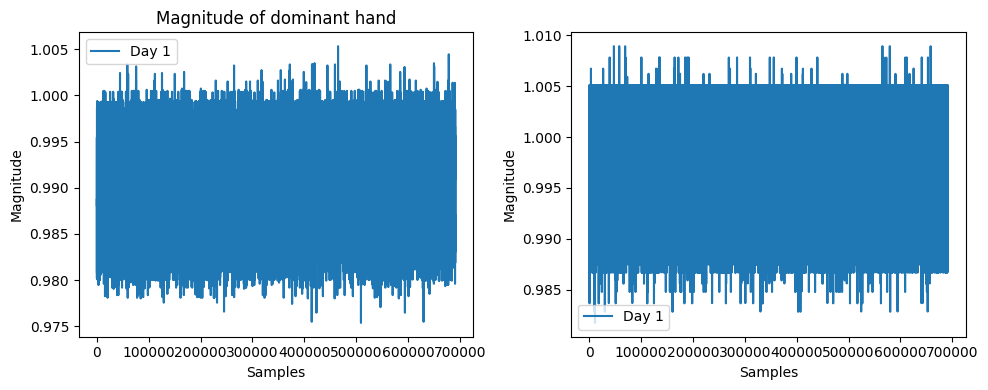

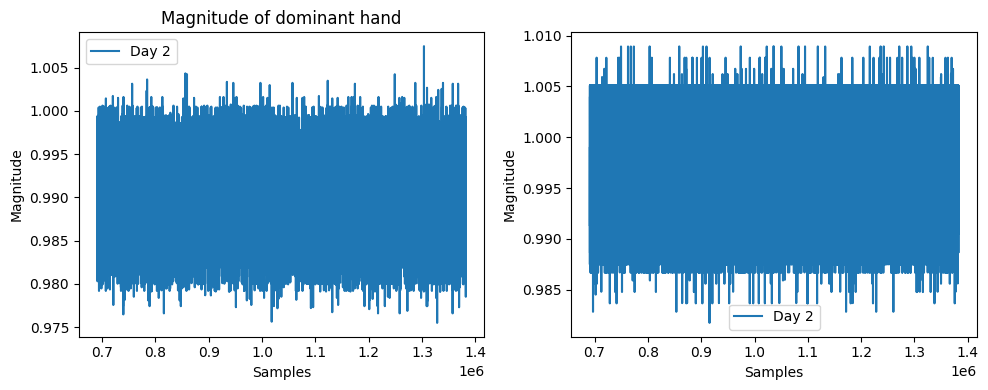

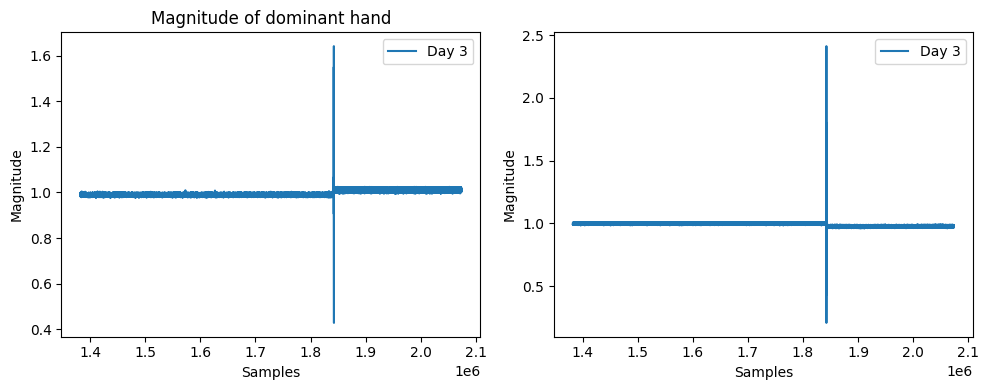

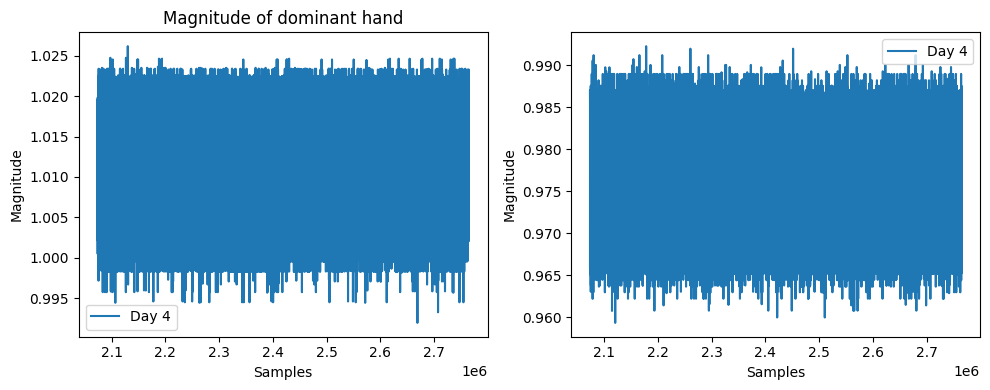

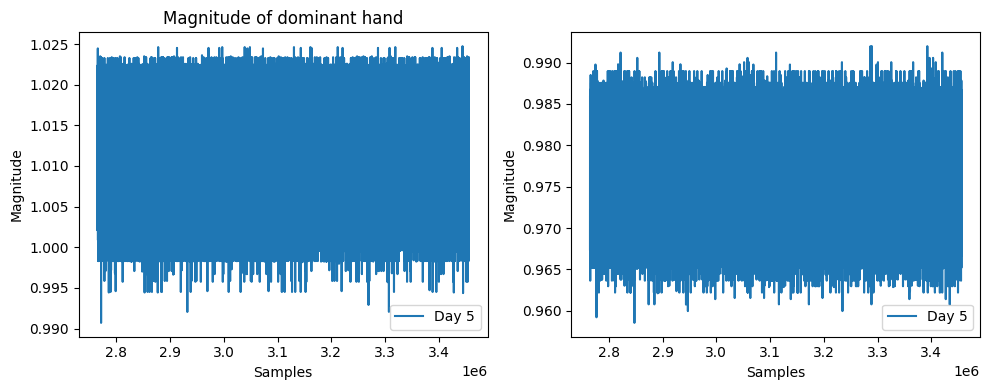

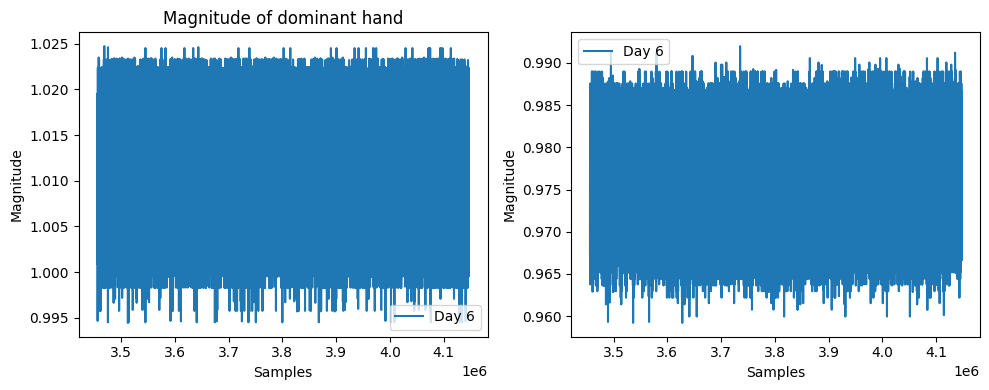

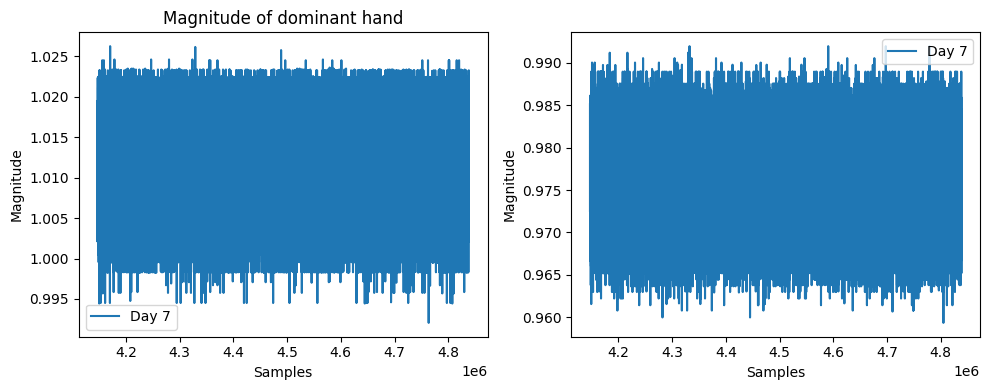

In [10]:
for i in range(DAYS):
    plt.figure(figsize=(10, 4))  # adjust the width and height as needed

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
    plt.plot(magnitude_D[i], label="Day {}".format(i+1))
    plt.legend()
    plt.xlabel("Samples")
    plt.ylabel("Magnitude")
    plt.title("Magnitude of dominant hand")

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
    plt.plot(magnitude_ND[i], label="Day {}".format(i+1))
    plt.legend()
    plt.xlabel("Samples")
    plt.ylabel("Magnitude")
    
    plt.tight_layout()
    plt.show()

# Considerations:

Need to analyze day three data because there something wrong with this data, considering the variance of all days including this would be a mistake here variance is high due to some anomaly.

We should take the mean of the A.I. of the three days (from Median.ipynb) and do comparison with the week data to understand what color should be the semaphore this day